In [1]:
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')

In [2]:
%reload_ext autoreload

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import glob

import h5py
import flammkuchen as fl
import seaborn as sns
from matplotlib.cm import ScalarMappable
import scipy
from scipy import stats

In [ ]:
from feature_extraction_helper import compute_leading_fin, reshape_feature_array

## Load data

In [7]:
master_path = Path(r'\\portulab.synology.me\data\Kata\testdata\Raw_Data')

fish_paths = list(master_path.glob('*f[0-9]*'))
fish_paths

In [37]:
fish= 0
fish_path = fish_paths[fish]
fish_id =  fish_paths[fish].name#[:-13]
exp_name = Path(fish_paths[fish]).parts[-2]
exp_name = 'testfish'
exp_name, fish_id

('110659_f0', 'testfish')

In [38]:
out_path = Path(r'\\portulab.synology.me\data\Kata\testdata\Processed_Data')

In [40]:
save_data_path = out_path

In [41]:
t_feature_vector_array = fl.load(save_data_path/ '{}_t_feature_vector_array.h5'.format(fish_id))
l_feature_vector_array = fl.load(save_data_path/ '{}_l_feature_vector_array.h5'.format(fish_id))
r_feature_vector_array = fl.load(save_data_path/ '{}_r_feature_vector_array.h5'.format(fish_id))

In [42]:
### tail, left fin, right fin

traces =  fl.load(out_path / '{}_tensor.h5'.format(fish_id))
traces.shape

(68, 3, 50)

#### Reshape data

In [43]:
max_n = int(l_feature_vector_array.shape[1]/4)
max_n

9

In [44]:
t_reshaped_array, t_peaks_a_array, t_peaks_i_array, t_valleys_a_array, t_valleys_i_array = reshape_feature_array(t_feature_vector_array)
l_reshaped_array, l_peaks_a_array, l_peaks_i_array, l_valleys_a_array, l_valleys_i_array = reshape_feature_array(l_feature_vector_array)
r_reshaped_array, r_peaks_a_array, r_peaks_i_array, r_valleys_a_array, r_valleys_i_array = reshape_feature_array(r_feature_vector_array)


Reshaped array shape: (68, 4, 9)
Reshaped array shape: (68, 4, 9)
Reshaped array shape: (68, 4, 9)


### Lets look at timing of first peak to extract leading fin

In [45]:

leading_fin = compute_leading_fin(l_peaks_i_array, r_peaks_i_array)
print("Comparison result:", np.unique(leading_fin))


Comparison result: [0 1 2]


In [46]:
fl.save(save_data_path/ '{}_leading_fin.h5'.format(fish_id),leading_fin)

2


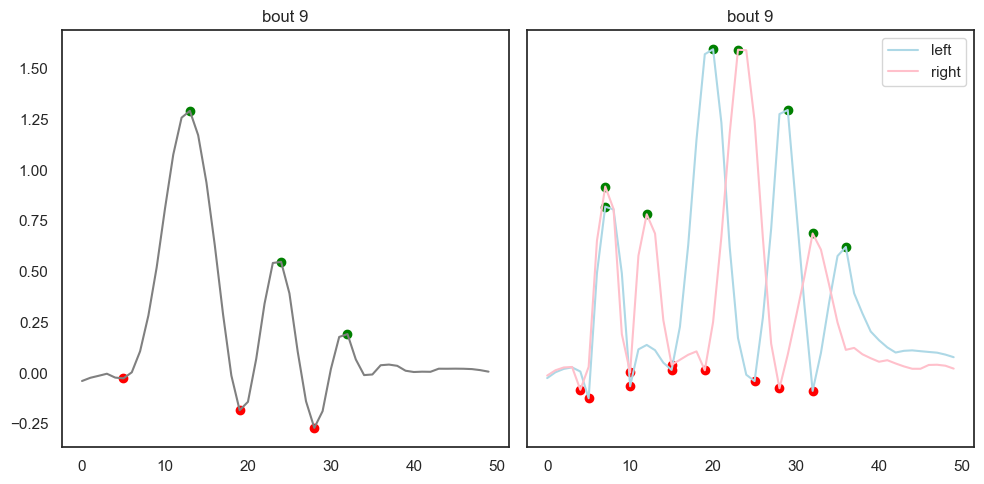

In [51]:
bout = np.random.randint(0,traces.shape[0])
print (leading_fin[bout])

fig, axes = plt.subplots(1,2, figsize=(10, 5), sharex=True, sharey=True)
axes = axes.ravel()
axes[0].plot(traces[bout,0,:], c='gray', label='tail')
axes[0].scatter(t_peaks_i_array[bout], t_peaks_a_array[bout], c='green')
axes[0].scatter(t_valleys_i_array[bout], t_valleys_a_array[bout], c='red')
axes[0].set_title('bout {}'.format(bout))

axes[1].plot(traces[bout,1,:]*-1, c='lightblue', label='left')
axes[1].scatter(l_peaks_i_array[bout], l_peaks_a_array[bout], c='green')
axes[1].scatter(l_valleys_i_array[bout], l_valleys_a_array[bout], c='red')

axes[1].plot(traces[bout,2,:], c='pink', label='right')
axes[1].scatter(r_peaks_i_array[bout],r_peaks_a_array[bout], c='green')
axes[1].scatter(r_valleys_i_array[bout], r_valleys_a_array[bout], c='red')
axes[1].set_title('bout {}'.format(bout))

plt.legend()
plt.tight_layout()